**Exemplo do algoritmo  não supervisionado k-means**

In [1]:
#importa as bibliotecas necessárias
from pandas import DataFrame
import matplotlib.pyplot as plt


In [2]:
#cria dados aleatórios
dados = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
       }

In [3]:
#cria o dataframe
df = DataFrame(dados,columns=['x','y'])
df.head()

,x,y
0,25,79
1,34,51
2,22,53
3,27,78
4,33,59


In [4]:
#adiciona as bibliotecas para construir o algoritmo
from sklearn.cluster import KMeans

In [5]:
kmeans = KMeans(n_clusters=2)    # cria o objeto de para o algoritmo k-means para encontrar 2 clusters
kmeans.fit(df)  #aplica o algoritmo
centroides = kmeans.cluster_centers_   #encontra as coordenadas dos centroids
print(centroides)

[[38.75       61.625     ]
 [47.07142857 22.14285714]]


Text(0, 0.5, 'Y')

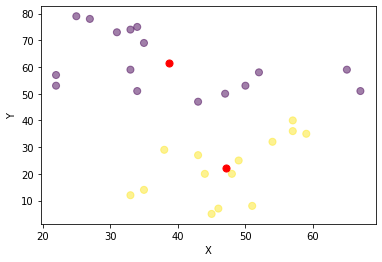

In [6]:
#realiza o plot do gráfico da saída
plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=50)
plt.xlabel("X")
plt.ylabel("Y")

**Exemplo do algoritmo Supervisionado  - KNN**

In [7]:
#importando as bibliotecas 
from sklearn import neighbors, datasets
import pandas as pd
import numpy as np

In [8]:
#cria a rotina para utilizar o dataset Iris
iris = datasets.load_iris()


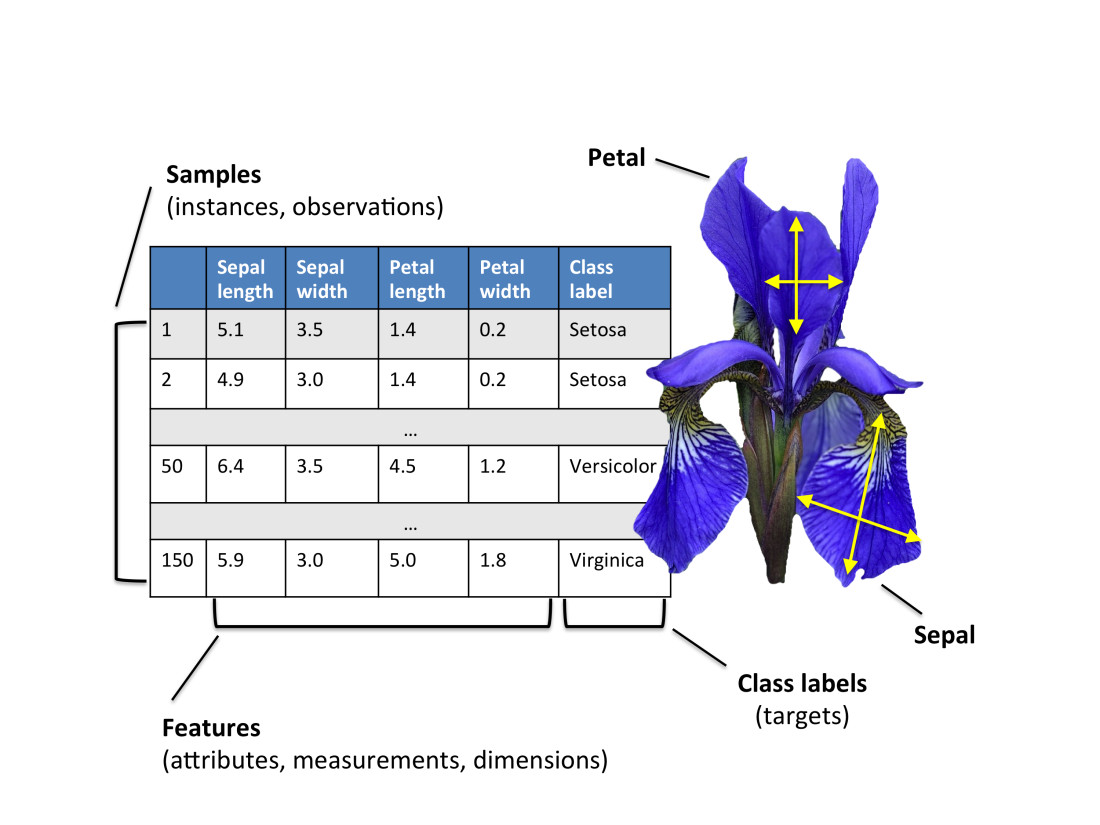

In [9]:
#Converte o banco de dados iris para o dataframe
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [10]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [11]:
df_iris.shape

(150, 5)

In [12]:
#transforma os dados em array
X = df_iris.iloc[:, :-1].values  #dados de entrada
y = df_iris.iloc[:, 4].values  # saídas ou target

In [13]:
#realiza a divisão dos dados entre treinamento e teste
from sklearn.model_selection import train_test_split   # função que realiza a divisão do dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)# divide 20% para teste

In [14]:
# realiza o processo de normalização dos dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  #objeto que normaliza os dados
scaler.fit(X_train)  #realiza a normalização dos dados

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
#treina o modelo 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5) #utiliza a construção por meio de 5 vizinhos
classifier.fit(X_train, y_train) # aplica a classificação

KNeighborsClassifier()

In [16]:
#realiza a previsão
y_pred = classifier.predict(X_test)

In [17]:
#constroi a matriz de confusão para comparar o modelo criado
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[14  0  0]
 [ 0  9  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       1.00      0.90      0.95        10
         2.0       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [19]:
#!pip install mlxtend

     |████████████████████████████████| 1.3 MB 1.4 MB/s eta 0:00:01


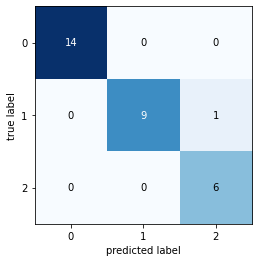

In [20]:
#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

**Exemplo do algoritmo Supervisionado  - Árvore de Decisão**

In [21]:
from sklearn.tree import DecisionTreeClassifier # importa o classificador árvore de decisão
from sklearn import metrics #importa as métricas para avaliação


In [22]:
# Cria o objeto de classificação através do 
clf = DecisionTreeClassifier()

# Realiza o treinamento do classificador
clf = clf.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred = clf.predict(X_test)

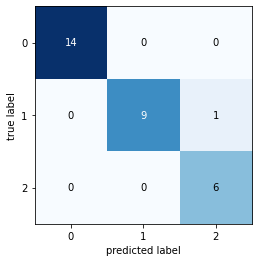

In [23]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

In [25]:
!pip install mglearn

     |████████████████████████████████| 540 kB 1.6 MB/s eta 0:00:01
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=9e812bbf59195c8b5831fcffd0ad68dc73d1f4f970d141bf7f7255311eb075ab
  Stored in directory: /home/jovyan/.cache/pip/wheels/87/75/37/404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


In [26]:
#visualização da árvore de decisão
#impor das bibliotecas necessárias para realizar a visualização da árvore de decisão
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

ModuleNotFoundError: No module named 'sklearn.externals.six'

In [27]:
#Constrói a árvore de decisão para o DB Iris
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = iris.feature_names,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('iris.png')
Image(graph.create_png())

NameError: name 'StringIO' is not defined

**Exemplo do algoritmo Supervisionado  - Suppor Vector Machine (SVM)**

In [28]:
#biblioteca necessária para a construção do SVM
from sklearn.svm import SVC

In [29]:
#cria o objeto SVM
clf = SVC()    

In [30]:
#realiza a classificação via SVM
clf.fit(X_train,y_train)

SVC()

In [31]:
#Realiza a previsão de classificaçao 
y_pred = clf.predict(X_test)

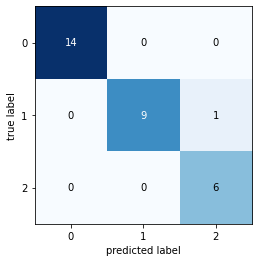

In [32]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

**Exemplo de Redes Neurais**

In [33]:
#definição da biblioteca
from sklearn.neural_network import MLPClassifier

In [38]:
#define a configuração da rede
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5, 5), random_state=1) #rede com escondidas com 5 neurônios cada 

In [42]:
#realiza o fit do modelo
clf.fit(X_train,y_train)

/opt/conda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(hidden_layer_sizes=(5, 5), random_state=1, solver='lbfgs')

In [43]:
#realiza a previsão
y_pred=clf.predict(X_test)

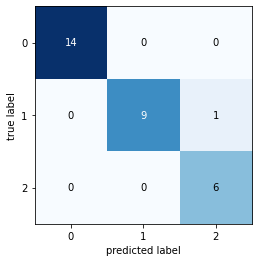

In [44]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

**Rede neural em deep learning com o TensorFlow**

In [45]:
from tensorflow.keras.layers import Input, Dense, Dropout, Activation  #importando as camadas a serem utilizadas
from tensorflow.keras.models import Model  #importando o modelo a ser empregado
import seaborn as sns #plotar gráficos

ModuleNotFoundError: No module named 'tensorflow'

In [244]:
dataset = sns.load_dataset('iris') #importando o dataset
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [256]:
#dividindo entre entrada e saida
X = dataset.drop(['species'], axis=1)
y = pd.get_dummies(dataset.species, prefix='output') #transforma cada uma das classes em vetores 

In [246]:
X.head() #entradas

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [247]:
y.head() #saidas

,output_setosa,output_versicolor,output_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [248]:
#divide os dados entre treinamento e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=39)

In [249]:
from sklearn.preprocessing import StandardScaler #aplica a normalização dos dados
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [250]:
entrada = Input(shape=(X_train.shape[1],))
camada_1 = Dense(100, activation='relu')(entrada)
camada_2 = Dense(50, activation='relu')(camada_1)
camada_3 = Dense(25, activation='relu')(camada_2)
saida = Dense(y_train.shape[1], activation='softmax')(camada_3)

In [251]:
model = Model(inputs = entrada, outputs = saida) #define o modelo

In [252]:
model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               500       
_________________________________________________________________
dense_17 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_18 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_19 (Dense)             (None, 3)                 78        
Total params: 6,903
Trainable params: 6,903
Non-trainable params: 0
_________________________________________________________________


In [253]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [254]:
#realizando o treinamendo da nossa rede 
history = model.fit(X_train, y_train, batch_size=4, epochs=20, verbose=1, validation_split=0.20)

Epoch 1/20
24/24 [==============================] - 0s 7ms/step - loss: 0.8122 - acc: 0.7917 - val_loss: 0.7525 - val_acc: 0.7917
Epoch 2/20
24/24 [==============================] - 0s 3ms/step - loss: 0.5161 - acc: 0.8229 - val_loss: 0.5750 - val_acc: 0.7917
Epoch 3/20
24/24 [==============================] - 0s 3ms/step - loss: 0.3770 - acc: 0.8438 - val_loss: 0.4661 - val_acc: 0.7917
Epoch 4/20
24/24 [==============================] - 0s 2ms/step - loss: 0.2946 - acc: 0.8646 - val_loss: 0.3864 - val_acc: 0.7917
Epoch 5/20
24/24 [==============================] - 0s 2ms/step - loss: 0.2361 - acc: 0.8958 - val_loss: 0.3955 - val_acc: 0.7500
Epoch 6/20
24/24 [==============================] - 0s 2ms/step - loss: 0.1942 - acc: 0.9375 - val_loss: 0.3260 - val_acc: 0.8333
Epoch 7/20
24/24 [==============================] - 0s 2ms/step - loss: 0.1603 - acc: 0.9583 - val_loss: 0.2832 - val_acc: 0.8750
Epoch 8/20
24/24 [==============================] - 0s 2ms/step - loss: 0.1336 - acc: 0.96

In [255]:
acuracia=model.evaluate(X_test, y_test, verbose=1) #acurácia do modelo

print("Acurácia do modelo:", acuracia[1])

1/1 [==============================] - 0s 1ms/step - loss: 0.1902 - acc: 0.9333
Acurácia do modelo: 0.9333333373069763
